<a href="https://colab.research.google.com/github/HugodiazC/Natural-Language-Processing/blob/main/Talleres_ACT_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Talleres ACT: Alimentando una I.A. !**
### **Introducción**

**¡Bienvenidos!** Este notebook nos da una guía paso a paso para aprender a realizar procesamiento de lenguaje. El Procesamiento del Lenguaje Natural es un campo de la Inteligencia Artificial que se ocupa de la investigar la manera de comunicar las máquinas con las personas utilizando las lenguas de uso común. 

En este notebook aprenderemos algunos pasos importantes para todo procesamiento de información:

**1- Obtener la información**

**2- Limpiar la información**

**3- Ordenar la información** 

**4-Alimentar un algoritmo de I.A. para generar texto**

El Output del primer día de trabajo será: 

**Corpus**: una colección de texto

**Document-Term Matrix**: recuento de palabras en formato matricial





Primero tenemos que importar las librerías que utilizaremos para correr el código. **Una librería** no es más que una serie de código de programación, un conjunto de código que alguien ha hecho para que tú puedes reutilizar dentro de tus proyectos.


### **Descargar librerias**
Una librería es un conjunto de recursos (algoritmos) prefabricados, que pueden ser utilizados por el programador para realizar determinadas operaciones. 

In [1]:
# Empezaremos importanto las librerías para la organización y limpieza de datos
import os
import pandas as pd #Esta es de las librerías más famosas y útiles para la organización de data. 
import re
import string
import pickle

### **Limpieza de texto** 

Funciones para limpiar texto, con ellas vamos a quitar todo los stopwords (Palabras vacías es el nombre que reciben las palabras sin significado como **artículos, pronombres, preposiciones, etc.** que son filtradas antes o después del procesamiento de datos en lenguaje natural)

In [2]:
def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text


def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text


### **Conjunto de Datos**
Un Dataset no es más que un conjunto de datos tabulados en cualquier sistema de almacenamiento de datos estructurados. El término hace referencia a una única base de datos de origen, la cual se puede relacionar con otras, cada columna del Dataset representa una variable y cada fila corresponde a cualquier dato que estemos tratando.


In [3]:
Text_TOKEN=""" '@gabxxle @joonieggukie @yeoubikook @chartdata @BTS_twt A group of playbackers ended a so called white woman with ea… https://t.co/4UiVXlSEi8',
 "I read that a Woman set up aGoFundMe to help pay off Harry and Meghan Markle's '£6.8m mortgage - this is the sort o… https://t.co/J5i9IQaQdl",
 'California has over 11k #UnitedStates #Veterans who are #Homeless #VETERANSFIRST\nWoman sets up GoFundMe to help pay… https://t.co/4oSoiFmeTo',
 '@CurtisWenis my wife was just telling me about a woman she knows, who’s younger than she is and whose job is not en… https://t.co/dqfBUXaj5z',
 'Re $8m lotto win... how did the lotteries commission release a statement with quotes from a man who, according to t… https://t.co/OUkOdP6Gqs',
 "In the night I hear 'em talk\nThe coldest story ever told\nSomewhere far along this road\nHe lost his soul to a woman so heartless 💔",
 "The Duke and Duchess of Grift... \n👇👇👇👇👇\n\nWoman sets up GoFundMe to help pay off Harry and Meghan Markle's '£6.8m mo… https://t.co/k73komwf2N",
 "Woman sets up GoFundMe to help pay off Harry and Meghan Markle's '£6.8m mortgage' https://t.co/0a5tV1wRPx #SmartNews",
 'If you got a tax bill for 8 million bucks on less than $20k of income, would you assume it was a scam and ignore it… https://t.co/YFmCpyph7r',
 "Woman sets up GoFundMe to help pay off Harry and Meghan's '£6.8m mortgage' https://t.co/NjITZPlfbY",
 'YouTube (C)\n\n97M - cardigan\n54M - exile\n28M - the 1\n27M - betty\n20M - august\n15M - my tears ricochet\n14M - tlgad\n13… https://t.co/dTJda3NAwU',
 '“Man is defined as a human being and a woman as a female — whenever she behaves as a human being she is said to imi… https://t.co/ZJgTRS5CjA',
 "Woman sets up GoFundMe to help pay off Harry and Meghan Markle's '£6.8m mortgage' - Mirror Online https://t.co/oEZN1wDbab",
 "Woman sets up GoFundMe to help pay off Harry and Meghan's '£6.8m mortgage' https://t.co/6jzxkxloeL",
 "Now here's something we can ALL get behind ♥️\n\nWoman sets up GoFundMe to help pay off Harry and Meghan's '£6.8m mor… https://t.co/CJvbBWhanS",
 'The apogee of abrogation of personal responsibility &gt; Woman sues Samsung for $1.8M after cell phone gets stuck insi… https://t.co/ut56hkPA4l',
 "Woman sets up GoFundMe to help pay off Harry and Meghan's '£6.8m mortgage' https://t.co/9Z4vQlnsAl https://t.co/F8PJUivBML",
 "Woman sets up GoFundMe to help pay off Harry and Meghan's '£6.8m mortgage' - The Mirror https://t.co/KFngeuKDaZ",
 "Woman sets up GoFundMe to help pay off Harry and Meghan's '£6.8m mortgage' https://t.co/YhDigLUPJs",
 'YOUTUBE NUMBERS (C)\n\n97M - cardigan\n54M - exile\n28M - the 1\n27M - betty\n20M - august\n15M - my tears ricochet\n14M -… https://t.co/yshYOjvUr9',
 "Woman sets up GoFundMe to help pay off Harry and Meghan Markle's '£6.8m mortgage' #SmartNews  https://t.co/fT9R3EvDDn",
 "Woman sets up GoFundMe to help pay off Harry and Meghan's '£6.8m mortgage' https://t.co/N7oMek5rr7",
 "Woman sets up GoFundMe to help pay off Harry and Meghan's '£6.8m mortgage' https://t.co/DychlJpas3",
 "Woman sets up GoFundMe to help pay off Harry and Meghan's '£6.8m mortgage' https://t.co/z1PZfhXs27 https://t.co/WxP57e7wRF",
 "Woman sets up GoFundMe to help pay off Harry and Meghan's '£6.8m mortgage' https://t.co/FSVVdXk32N",
 "Woman sues Samsung for $1.8M after cell phone gets stuck inside her vagina https://t.co/8d4W3usVPn \nAren't frivolous lawsuits illegal?",
 "Woman sets up GoFundMe to help pay off Harry and Meghan's '£6.8m mortgage' https://t.co/lRvdUXCa25 Donate money for… https://t.co/7MKXcRgra3",
 "Woman sets up GoFundMe to help pay off Harry and Meghan's '£6.8m mortgage' https://t.co/TLwHQdGsAi FFS STUPID YANK",
 "Woman sets up GoFundMe to help pay off Harry and Meghan's '£6.8m mortgage' https://t.co/z1PZfhFRaz https://t.co/jwgJD9AZ2q",
 "Woman sets up GoFundMe to help pay off Harry and Meghan's '£6.8m mortgage' https://t.co/5D8UlQFiJC",
 "Woman sets up GoFundMe to help pay off Harry and Meghan's '£6.8m mortgage' https://t.co/JoNTI9esnF  This is what It… https://t.co/Ka1YGXCDWk",
 "Woman sets up GoFundMe to help pay off Harry and Meghan Markle's '£6.8m mortgage' #SmartNews  https://t.co/ApmjMyd5JR",
 "Woman sets up GoFundMe to help pay off Harry and Meghan's '£6.8m mortgage' https://t.co/z1PZfhXs27 https://t.co/cNMsLXiqlu",
 "Woman sets up GoFundMe to help pay off Harry and Meghan's '£6.8m mortgage' https://t.co/mbPHiG11Dz",
 "I cannot believe it!\nI refuse to believe it.\n🤦\u200d♀️🙈😱\nWoman sets up GoFundMe to help pay off Harry and Meghan's '£6.8… https://t.co/mfXqBcjfZ1",
 "👇 GoFundMe page to pay off Harry and Meghan's £6.8m mortgage taken down after it only raised £80.\n\nPlease don’t lau… https://t.co/7aw7xoWgz4",
 "Woman sets up GoFundMe to help pay off Harry and Meghan's '£6.8m mortgage' https://t.co/zc829dGlXU",
 "Lot of Fruitcakes in this crazy world 😝 \nWoman sets up GoFundMe to help pay off Harry and Meghan's '£6.8m mortgage' https://t.co/hNTf1CgFcW",
 "Woman sets up GoFundMe to help pay off Harry and Meghan's '£6.8m mortgage' #Mortgage via https://t.co/eBW8Lmmpx7 https://t.co/XC62WUpCo7",
 "Woman sets up GoFundMe to help pay off Harry and Meghan's '£6.8m mortgage' https://t.co/z1PZfhFRaz https://t.co/8uZ5ySqVzc",
 "U couldnt make it up ... 😳🙄🤪\n\nWoman sets up GoFundMe to help pay off Harry and Meghan's '£6.8m mortgage' https://t.co/eJyd6odlEn",
 "Woman sets up GoFundMe to help pay off Harry and Meghan's '£6.8m mortgage' #Mortgage via https://t.co/vBsHOsqluy https://t.co/Z1PsXe4a8e",
 'This female is clearly cracked. This is what is what is wrong in the world. Imagine being so woke you set up a char… https://t.co/dTPmWDm8Gc',
 "mirror: Woman sets up GoFundMe to help pay off Harry and Meghan's '£6.8m mortgage'... #Mortgages… https://t.co/mDBFtVrnq7",
 "Woman sets up GoFundMe to help pay off Harry and Meghan's '£6.8m mortgage' #Mortgage via https://t.co/yzEtMPxlGK https://t.co/yPiwcM0BOe",
 'OMG!MEGHAN &amp; HARRY ARE FINANCIALLY IN A GOOD POSITION TO PAY OFF THEIR MORTGAGE. GOFUNDME LOL...Woman sets up GoFun… https://t.co/DqNJOZUsAX',
 "This is a spoof story, right? \n\nWoman sets up GoFundMe to help pay off Harry and Meghan's '£6.8m mortgage' https://t.co/T6kMchafs6",
 "Woman sets up GoFundMe to help pay off Harry and Meghan's '£6.8m mortgage' https://t.co/z1PZfhXs27 https://t.co/lkUjhm2Z7F",
 'songs ab 4,000,000 on the us: \n\nthe way\nproblem\nbreak free\nbang bang\nlove me harder\ndangerous woman\ninto you\nside t… https://t.co/7b6pkgRbVx',
 "Woman sets up GoFundMe to help pay off Harry and Meghan's '£6.8m mortgage' - The Mirror https://t.co/vWCTKMudrC",
 "Woman sets up GoFundMe to help pay off Harry and Meghan's '£6.8m mortgage' https://t.co/gFBLyHXl7y",
 "Woman sets up GoFundMe to help pay off Harry and Meghan's '£6.8m mortgage' https://t.co/bdHXodXG6v https://t.co/etBp9UYlrI",
 'Seriously! Are we living in the year twenty twenty dumb!\n\n‘Woman sues Samsung for $1.8M after cell phone gets stuck… https://t.co/eNFbsSSkM7',
 "It didn't specify which Samsung phone but seems like this is a somewhat loose woman  https://t.co/DHYtzawgfy",
 '@ReallySwara - you alright dearie?? \n\nhttps://t.co/AfAd7dTrMc https://t.co/QGFFlKX4cK',
 'Woman sues Samsung for $1.8M after cell phone gets stuck inside her vagina https://t.co/K8rQvDerS4',
 'You cannot make this crap 💩 up and they still get a payout \n\nWoman sues Samsung for $1.8M after cell phone gets stu… https://t.co/Hq3BgskWn3',
 '😳 ok....what the actual fvck...?\n\nWoman sues Samsung for $1.8M after cell phone gets stuck inside her vagina https://t.co/rz92Pltu8U',
 "I wonder if @piersmorgan has finally twigged that 7.8m followers doesn't necessarily mean advocates.  If he was a w… https://t.co/OLWJWTUcUl",
 'She put her phone inside her vagina. Yep. So much to unpack here. First thought? Was it a top end phone cause, why… https://t.co/0HbdajgQNa',
 'Woman mistakes phone for vibrator 🤣🤣🤣 I can’t believe people need warning labels not to stick their phone up their… https://t.co/hbqJCLXTfM',
 'Stories like these make it a struggle for me to believe in evolution..... https://t.co/GlF6ZzW6kp',
 '🚨BREAKING NEWS 🚨\n🧐\nWoman sues Samsung for $1.8M after cell phone gets stuck inside her vagina https://t.co/l61NLpCUmw',
 'A Steller moment do something very stupid and then SUE the company for your own foolishness.  Did she put it on vib… https://t.co/OxSx3P4uVI',
 '@ellymelly Woman sues Samsung for $1.8m after cell phone gets stuck insider her gender neutral ham wallet.\n\n**Fixed it',
 'Woman sues Samsung for $1.8M after cell phone gets stuck inside her vagina https://t.co/NM3S73gMKZ',
 'I’d quite like to see the wording of the warning they come up with in response to this and how they make it inclusi… https://t.co/CgZnDfo2HI',
 'Happy to be a Woman. \nForce all.  \n8m\n💪🏻💪🏼💪🏽💪🏾💪🏿 https://t.co/Bv1FLwRurp',
 "Woman sues Samsung for $1.8M because they didn't specify to NOT insert the cell phone inside her vagina. https://t.co/EYsHyVKrPr",
 'Rendered speechless...I have nothing 😐 https://t.co/fIKRu9aTzZ',
 '@Roger_Smith_911 “Woman sues Samsung for $1.8M after..”??\nWas the cell phone still in its box too ???',
 'This is an example of not taking responsibility for your actions. Thanks for the scoop @The_Walrus007 \n\nhttps://t.co/zyt2843Ejs',
 'I always wondered why the vibration call alert 🚨 was created. \n\nA Woman sues Samsung for $1.8M after cell phone get… https://t.co/hXBtH7B3v9',
 'Woman sues Samsung for $1.8M after cell phone gets stuck inside her vagina: F*k Me 🤷\u200d♀️ https://t.co/QFoF4E1cj2',
 "@Kate18660449 I knew the smart phone vibration setting would 'come' to no good!! Maybe if the woman is awarded the… https://t.co/gPe3Ei6uhF",
 'International Women’s Day doesn’t go unnoticed in Ms. Briseno’s class.  Students shared which woman in history is i… https://t.co/Z04Mj24X3T',
 'Another hard work on #cancer #research from my partner, another great #woman in #science!! You are an example of… https://t.co/nZMunCnAjA',
 '@njwthal Luego las ves el 8M de woman support woman😍😍😍',
 'Judas &amp; The Black Messiah leaves HBO Max on Monday. \n\nWonder Woman 1984 has been in the $19.99 streaming rental and… https://t.co/nl9Zkoqkox',
 'https://t.co/KQEQvemtH7 A woman who stole goods for 19 years and sold them on eBay has been sentenced to prison and… https://t.co/biNaOIz83X',
 "@Wild4OxfordWA @MrHarryCole I think piers needs to be careful he's a celeb 8m followers so running a campaign on tw… https://t.co/7UGusfdFuP",
 'Wonder Woman quien eres? 🤩😍🙌🏻💜💚💖\n\n#8M #8M2021 #Feminismo #Feministas #JuntasSomosMasFuertes #Sororidad #Mujeres… https://t.co/21yJeK3zXd',
 '"When she stopped conforming to the conventional picture of femininity she finally began to enjoy being a woman" -… https://t.co/nfIU363yAC',
 'Two days after #8M my mother has had her vaccin, Pfizer mRNA. And I’d like to remember and thank the woman who made… https://t.co/7PVsSEKmXf',
 "For Woman's Month and International woman's day, I find it hard to believe that #ESPN hasn't mentioned not one Tran… https://t.co/gMT3yjYNd4",
 '@valnitto @darkyonce92_ @chartdata @billieeilish My everything:10m+\nThank u next:8.5m+\nDangerous woman:8m+\n\nFine tank:5m😭',
 '22-year-old woman docked over alleged theft of N1.8m - https://t.co/uS5t4Y0es5',
 '22-year-old woman docked over alleged theft of N1.8m - https://t.co/4xDvaTwIRe',
 'New post: Woman, 22, docked over alleged theft of N1.8m https://t.co/zPCyDwbwHc',
 'Woman, 22, docked over alleged theft of\xa0N1.8m https://t.co/l4i899uaFU',
 'Woman , 22, accused for theft of N1.8m\nhttps://t.co/MY3eToP4U2',
 '@babajide_itunu So if a woman is for sale the price would be 1.8m?',
 "'Being a woman is not a feeling.\nMen rape, kill and oppress us because of our sex.\nRespect our existence\nOr expect… https://t.co/JAs7duspNg",
 'Trans “woman” in 8M March in Chile. While women are grieving the deaths of their daughters, friends, and sisters th… https://t.co/6VX4fe2OLB',
 'US Box Office 5th Mar 2021\nhttps://t.co/xjytkaRZZj\n1. Raya and the Last Dragon - $8.6M\n\n2. Tom and Jerry: The Movie… https://t.co/eYwWl71cW9',
 "It's women's month and so far I've heard:\n-That I have to chose between PCOS or PMDD symptoms, no other choice.\n-A… https://t.co/bvHO11v4y0",
 'One is not born, but rather becomes a woman.\n-Simone de Beauvoir-\n\n#8m #diadelamujer #noalaviolencia #niunamenos… https://t.co/Wx5YvHHYP3',
 '@LOVESICKJENNlE how do you know they identify as non binary??? also these pics don’t look like they’re from yesterd… https://t.co/WVOcwuad8v',
 '@piersmorgan Says a man who has 7.8m followers and is currently bullying a young black woman for having the audacity to stand her ground.',
 'I never had the courage to talk out loud about my story of abuse and extortion but yesterday the man who did that t… https://t.co/LQ4ssVcg0i',
 'WOMAN MADE THEIR MARK (TOO)\n\nThroughout history hundreds of women have marked a before and after in the artistic wo… https://t.co/Ei2izpXBSa',
 "'Being a woman is not a feeling.\nMen rape, kill and oppress us because of our sex.\nRespect our existence\nOr expect… https://t.co/xGrtU0YIXn",
 '@Independent One day past at #8M and woman wrong again? Really? Is dead man',
 'For most of history, ANONYMOUS was a woman #8M',
 '@fluffysmolcloud If only you know.\n \nIn my country (memexico) therebis a deep hatreat to feminism and woman in gene… https://t.co/xyFz8EGxPI',
 '“Go patriarchy!” says one of the cops guarding Palacio Nacional during the feminist protests on Woman’s Day in Mexi… https://t.co/dES54iW6bv',
 'You’ll believe God is a woman. 💜 #NiUnaMenos  #8M2021 #8M #GODISAWOMAN https://t.co/EayZNzhCIg',
 'If you never been told how you gotta be, what you gotta wear, how you gotta speak, if you never shouted to be heard… https://t.co/WNuDkf2tQu',
 'If I had an opportunity of being born again, would return to being a woman. Always loving, always living and always… https://t.co/HV6ogX7hH2',
 '@Vivid_Blurr it was literally the first twt that popped up on my tl, i would have replied the same thing on ANY twe… https://t.co/qu1ILD5uC0',
 'mi tracklist del 8M;\n\ngirls like us \nkiss latter\nget loud\ntrick it\ngod is a woman\nwoman like me\nchica\ngashina\nhip',
 'Work for strong not for skinny\nWOMAN POWER\n#8M 💜 en Iguana Gym Fitness Club https://t.co/ucldSpsirl',
 "I love being a woman, but I don't want to be congratulated on this day. On March 8 it is fought, it is not celebrat… https://t.co/pWDePzNgPy",
 'We demand #socialjustice for #women. We need greater participation of women in the #political, #social,… https://t.co/cyQD6Expcz',
 'Behind a powerful woman, there is Herself fighting against everything, everyday.\n#8M #DiaInternacionalDeLaMujer… https://t.co/8pNAukzupV',
 '1/12 I’m a woman and many people depend on me\nI’m a woman and I am perfectly imperfect\nI’m a woman\nLinda Mera… https://t.co/hJMz968Gye',
 'God is a Black WOMAN!!\n\n#8M',
 'remember her? one of the best and strongest woman ! #8M 💜 https://t.co/321qWqqdwm',
 'Corinne Simpson, first woman to join the NAR (1910)\n\nWomen’s day is everyday, thank you for making this world a muc… https://t.co/NwkeImq1QW',
 'Meet this amazing woman\nhttps://t.co/4BXrCG9ttF\n#8M',
 '💪🏼💁🏻\u200d♀️¡Be brave, be strong, be yourself, be a real woman!🥰\n\n#attitude #energy #strong #love #care #realwoman… https://t.co/bpKF4dP1GR',
 'To the Woman that Inspire me, and all... I stand with you, to push for social justice, and security to all. \n\n💜💚… https://t.co/IJo4OmUR71',
 "For an equal and brighter future for ALL WOMAN! For the ones that aren't here with us today✊🏼✊🏼✊🏼 #IWD2021… https://t.co/H3jkimBAau",
 '"you\'ll believe god is a woman"\n#8M https://t.co/dJTsEloEA4',
 "I am woman, hear me roar\nIn numbers too big to ignore\nAnd I know too much to go back an' pretend\n'Cause I've heard… https://t.co/pewSpMVucn",
 'This #8M I just wanna say:\n\n* A woman prevented me from dropping out\n* A woman encouraged me to go study a semester… https://t.co/sr4i3vcuTv',
 'Today we honour every single woman in our Department, University, 🇨🇦 and the 🌎. We are very grateful and proud for… https://t.co/UrkdKXjRoA',
 'Don’t get me wrong, but 8M is not a celebration day, it’s a day to remember the women who died in that fabric prote… https://t.co/J62Ktf5BuJ',
 "#mexico goverment don't care for #8M\n#woman https://t.co/X5JRvyrKpQ",
 "bobby womack - woman's gotta have it \n\ncompositora: linda womack 💜\n\n#8miau #8m2021 #8m #niunamenos… https://t.co/O8kaf2DgKY",
 'God is a Woman 🌛🌝🌜\n#8M #díadelamujer',
 '8M 2021 - Woman’s day 💜',
 "Happy Women's Day @HilaryDuff, we are proud of you, the woman, mother, actress, singer and writer that you are. We… https://t.co/y4UZZZQCuG",
 "“And there's nothing like a mad woman, what a shame she went mad. No one likes a mad woman, you made her like that”… https://t.co/91cfXpHLAT",
 '@akapoulainne I feel like a woman! 🤭💜 #8m #creemesoyunzanahorio',
 'Being a woman in Latin America means watching a sister die by the hands of a man she loved every 23 hours.\n\n"Being… https://t.co/vSnsdypcvA',
 'TW Violence\nThe "funny part" is the ✨duality✨\nToday I\'m triggered bc I\'m a woman, living in México a country where… https://t.co/nO0aOBUFJJ',
 'On “A Vindication of the Rights of Woman”, by Mary Wollstonecraft (1792).\n\n«The original problem behind the disaste… https://t.co/xwHXUiacOS',
 'I\'m Every Woman; Whitney Houston.\n["The Bodyguard" OST; 1992].\n\n#WhitneyHouston\n#8M #8M2021\n\nhttps://t.co/4LVJCEMD4j',
 'God is a woman\n8M 💜 https://t.co/4N4bB5oMRc',
 "Catholic Church in Spain International Women's Day by posting 'Hail Mary' at bus stops to praise 'the best woman' https://t.co/RM4SklsjSz",
 "Bc it's 8M I'm going to tell some of the things that happened to me for being ✨ a woman ✨",
 'To be a Woman means a lot. In all their versions, women are amazing. All meanings are true to their essence, true t… https://t.co/N0fYxuhyXe',
 'To celebrate International Women’s Day on the 8th March, a diverse range of women across the AI sphere tell us what… https://t.co/UhA2riLHbM',
 'I am Ophelia. She who the river could not hold. The woman on the gallows The woman with  the  slashed  arteries  Th… https://t.co/7mb9F4yTis',
 'Valentina Tereshkova, the first woman in space. This photo was taken in 1969.( 8M ) https://t.co/YOuJzzQ5xt',
 'Aretha Franklin - (You Make Me Feel Like) A Natural Woman [1967] https://t.co/jHbkfAjuIr via @YouTube #8M 💜💜💜',
 'Fight like a stoner girl! 💪🏽✨\n.⠀\n#8M 💚🌱⠀\n.⠀\n.⠀\n#grlpwr #girlpower #womansday #woman #ganja #ganjatalks #whoishappy… https://t.co/4EkGa81Mhb',
 'Empowered #women are not afraid to ride in the city!\n\n#WomenPower \n\nBe a #Cosmic #Woman #8M https://t.co/giIj5Vr5gl https://t.co/8bxWiOP0jn',
 'Thank YOU, Victoria @villanaart 🧵✨👏🏼\nAmazing name, amazing talent!\n\n#FLOWwithyourpower, woman!!!\n\n#myflowacademy… https://t.co/JzmoTVjQmE',
 "This flag is circulating in México for the #8M #8Marzo2021 international woman's day:\n\nViolet: Official color of th… https://t.co/xSt0ZCbBOL",
 'hey siri play god is a woman by ariana grande #8M',
 "Express your woman-kind fight for your rights, if you're a strong female you don't need fuckin' permission!\nWithout… https://t.co/GNY1iE4lyA",
 '—— You’ll believe God id a woman ♀︎\n\n                           8M.💜 https://t.co/pn3D9VW5L4',
 '"Do not mistake yourself for a guardian, or a muse, or a promise, or a victim, or a snack. You are a woman - skin a… https://t.co/UU8T9YUkWG',
 '🇬🇧 Even if being a woman can be hard, dangerous or even a shame in some parts of the world, we still have a central… https://t.co/LfBcGQH2wZ',
 "I'm a motherfucking woman, baby, alright, idon't need a man to be holding me too tight.\n#HappyWomensDay… https://t.co/ejo11sL281",
 'a man telling me, a woman, what to twt during 8M? shut uuup',
 'One woman can make a difference, but together we can rock the world! 💜\n\n#internationalwomensday #8M #posture… https://t.co/0nplJTgxxJ',
 '@AGrandeAO GOD IS A WOMAN 8M',
 'Something I wouldn’t expect a couple of years ago: today I gave a presentation at work, to all my colleagues, about… https://t.co/CP1ljfOJYk',
 'What an honour to have worked with this incredible woman @lapulidotrina \n#8M https://t.co/FBDrL7lWbs',
 '8M💜\nthe woman is everything!! 8️⃣💜 https://t.co/JBKQZiKi0W',
 'I want you free,\nI want you happy, \nI want you alive. \n\nWoman, I want you to know: \nYou are everything, \nYou are wo… https://t.co/5tHKUM4Eio',
 'Yes, there was another woman director, #DianeKeaton (2.15);the author of the Secret Diary of Laura Palmer… https://t.co/aRU51skS8g',
 "- Woman's World, Little Mix 💜\n\n#8M2021 #8Marzo2021 #8M #Diadelamujer #feminismo #WomensDay #womenpower #WomensDay… https://t.co/CEClmvTHZH",
 'Agh, apparently I am still too woman to eat smokey bbq sauce 🙄 #8M https://t.co/2IQkrQHi5C',
 '“Listen to every woman who came before you. Listen to every woman with you now. And listen when I say to you to tak… https://t.co/cIpTJ4k7qm',
 '#WomenInspireNutanix\n\n"There is no demand for women engineers as there is for women doctors, but there is always a… https://t.co/WqRl6vMjBX',
 "@starwars A woman's place is in the resistance #8M2021 #8M #LeiaOrgana https://t.co/DFVc5lgljC",
 '#8M See-Line Woman by Nina Simone https://t.co/r5DSRIf18s #NowPlaying',
 'Every woman needs a wolf pack, so reach out to yours. #8M https://t.co/MljVQTOfJc',
 'The best thing a man can do for a woman is mind his own business and not make rules for her. #8M #internationalwomensday2021',
 '1) Happy nothing.\n\nEquality will be so when woman’s net worth is equal to men’s. \n\nWomen are 3 times more poor than… https://t.co/LkuYVrwxDZ',
 'On this important day, I want to remember the woman who inspired a generation of Spanish scientists, one of the mos… https://t.co/vxhNLlj4fK',
 'Happy day women! For a world where talent is what matters. Amalia and I have been lucky, the men of this saga have… https://t.co/7puxll6LhV',
 '🗓 8th March - INTERNATIONAL WOMEN\'S DAY 💥\n\n"Every woman\'s success should be an inspiration to another. We\'re strong… https://t.co/xtelOLOhWT',
 'Creator of life, symbol of Beauty and inspiration.\nHave a nice day.\n.\n.\n.\n.\n.\nTags\n#woman #youngwoman #mother #8m… https://t.co/X2Cv7anDDh',
 "That doesn't mean this day passes through me without rage. As an AFAB I am part of this day too. I am not a woman,… https://t.co/Xe9fLhZGat",
 '@ZackSnyder Wonder Woman teaser on 8M, nice touch.',
 "There's no limit to what we, as women, can accomplish.\nSo yes, God found the strongest woman and made them CAREGive… https://t.co/Z2slF326Vk",
 'She is Art. She is Magic. She is Woman. She is You.\n#IWD2021 #ChooseToChallenge #8M #March8 https://t.co/YlCBW38Ew2',
 'The best gift of the world. A little woman.\nFor a more free and egalitarian world. Happy womens day\n#8M #femisim… https://t.co/OmiOnO1qEd',
 "You are Beautiful!🌸 You are Amazing! 🌼 You are a Woman!\nHave a great Day! 🌷 Happy Women's Day!\n\n#womensday… https://t.co/ymHXGg0Snp",
 'Today we want to tank every woman, that has stood against the waves of oppression. To every woman that has contribu… https://t.co/cZlC5wvitG',
 'Anyways como dijo Ariana Grande\n✨God is a woman ✨\n#8M',
 "women's Day. \n\nFor you woman, I wish you could be free, walk the streets without fear, decide on your own body. \n\nF… https://t.co/BirofcGlcI",
 'IT’S A WOMAN’S GAME!\n\nWomen of all professions, nationalities, backgrounds, and gender expressions have been changi… https://t.co/74NX9nLIe3',
 'Every woman should feel like she owns her body, not like she owes the world an explanation for it.\n\n#8m #8marzo… https://t.co/NEWt1pOwdq',
 'GOD IS A WOMAN ES TENDENCIA POR EL 8M AMO',
 'I am not free until every woman is unfree, even when her shackles are very different from my own. - Audre Lorde… https://t.co/zCHfV4peqs',
 'this woman has 18.8M followers. how many did jesus have when he was 24? 🙁 https://t.co/b33TYw1tEM',
 "@PMan578_2 Oh we call it 8M in chile, today is woman history day\nHappy commemoration day pickle, since you're a girl it's your day too",
 'If you never been told how you gotta be\nWhat you gotta wear, how you gotta speak\nIf you never shouted to be heard\nY… https://t.co/qUONy2UL4X',
 'International women’s day💞\nAll the power to anyone who identifies as a woman ✊🏾💜\n#8M2021 #8m #8Marzo2021 #Feminism… https://t.co/zBi1EtD3A8',
 '“I am woman phenomenally. Phenomenal woman, that’s me”. - Maya Angelou\n\n#8M #díadelamujer #disruptivefintech… https://t.co/tKvwmHG2oU',
 'God is a woman. #8M.',
 'I want not to be underappreciated by my male colleagues or friends. \nI want equal pay for the same job. \nI want to… https://t.co/b1tV593wSn',
 'Y como dijo Virginia Wolf "As a woman i have no country. As a woman my country is the whole world" \n#8M',
 'I’m a woman what’s your Super power?\n\n#يوم_المراه_العالمي \n\n#WomensDay https://t.co/n0Idx9PlHb',
 'What great words from a great woman #AnneFrank #8M https://t.co/8oWjUxg4ZH',
 'I’m a woman, I am a scientist and I am a runner 💜 \n\nToday’s run of 10 km to celebrate the #IWD2021… https://t.co/8VgRPvmehX',
 'Good article about a Dangerous Woman @Chicago_Reader \n\n #UnaMujerPeligrosa #LucyEldineGonzálezParsons… https://t.co/ZmrlFcWCcY',
 'because of this comments. I decided to write my own liberation from the constant policing over my existence as a wo… https://t.co/3E8kpv6s7v',
 'Remember: woman should have respect and and treatment as equals every day, not just today. A commemorative day does… https://t.co/h16xiwBSJg',
 '"Look, I did a wee bit of reading, and it turns out that for the most of the history of this planet men have treate… https://t.co/6l0jLK67Wx',
 'On the #8M about the care to the health of a woman &amp; racism.\n🙄\nThat shit is set, bad set BTW.\n https://t.co/thUv3MSapN',
 'Hoy 8/03 Despliega fuegos artificiales y balizas a las 20hrs. Today March 8 at 8:00 p.m Gmt-3. We commemorate the w… https://t.co/FfjDT9cjB1',
 'happy woman’s day 💜 / for all womens , all days are 8M 💪🏽💜 https://t.co/znfSYtORUL',
 'This #indigenous #UWA #woman, along with other families displaced by the war, show their culture and dances on wome… https://t.co/NTUzwtCZoA',
 '1 year ago was the last day that I went out before the lockdown. It still give me shivers when I remember how it fe… https://t.co/DavRySjl89',
 "Nothing says 'I'm an international woman' like having therapy on #8M",
 '🔔Some of our @ep2lab women researchers 👩\u200d🦰🚀 have participate in this post published in @PhDAeroUC3M to celebrate th… https://t.co/LxXdIhGQy6',
 '#8M if you want to know what it\'s like being a woman living in Mexico.\n\n"I want to live, not survive"\n\nalso check m… https://t.co/mknCaTLsk6',
 'We realize the importance of our voice when we are silenced \nMalala \n#iwd #iwd2021 #choosetochallenge #8m #8marzo… https://t.co/b48LLpjsnJ',
 'Chilean label Modismo and Woman in Power, present "Vivas, Libres y Unidas" a V/A w/ tracks by @Alusiva @pazmiranda… https://t.co/PIAVkDIQR0',
 '@MaxduPreez @BiancavanWyk16 An $8m play by the woman who gave the world Dr Phil. Every inch credible. And this is how it is.',
 "This did not take a huge effort on my side. If everyone reading this tweet created just one article with a woman's… https://t.co/Q4VwiLLYOF",
 '🔔📢Today in @PhDAeroUC3M of Universidad Carlos III de Madrid @uc3m celebrate the #InternationalWomensDay #8M 👩\u200d🦰👩\u200d🎓… https://t.co/1KYArnwQxP',
 'Today March 8 at 8:00 p.m Gmt-3. We commemorate the woman with beacons and fireworks in your scanner. Use hashtag… https://t.co/X6FfFP7kFS',
 'My existence as a woman is a target. Do not congratulate me today when we are still tortured, raped, assaulted and… https://t.co/UX0vWPWBnC',
 'Today March 8 at 8:00 p.m. We commemorate the woman with beacons and fireworks in your scanner. Use… https://t.co/tHJUWLEC2v',
 'happy day?? happy will be the day that no woman is missing #8M',
 "No, it's not wallpaper and it's not a fake background.\n\nDiscussing business in Chile for a UK client via Zoom from… https://t.co/lXFCDOb6fk",
 'My strong, beautiful and authentic little WOMAN. ❤️🐯❤️\n#8M\n#internationalwomansday https://t.co/fIg3HlpdNL',
 'Virtuous woman!!!... Love &amp; Hope.\n#8M #Virtuouswoman https://t.co/xXkCN7XGbN',
 'A successful #woman is one who can build a firm foundation with the bricks others have thrown at her. And that succ… https://t.co/j85bmxwyXZ',
 '"8M" doesn\'t feel like a day to be celebrated and be happy about for being a woman. It feels like a day to be furio… https://t.co/15N15viLkt',
 '#8M History has 900 winners of Novel award. Only 19 of them are woman @FBCB_UNL @UNLitoral @CONICETDialoga https://t.co/JgmqwqRSRv',
 "🚺 women's Day 🌹 \n.\n#8m #8marzo #diadelamujer #mujer #mujeresemprendedoras #mujeres #mujeresvalientes #woman https://t.co/jL6RWIZ3PB",
 'I just wanna be a woman #8M',
 'Share with me some feminist art from woman!! I want to support, share and buy💪✊ 🌟#8m #InternationalWomensDay #nftart #NFT',
 'i believe in woman supremacy #8M',
 '“Where there is a woman, there is magic.” –Ntozake Shange\n#WomensDay\n#InternationalWomensDay\n#RespectWomen #8M… https://t.co/c0uL4qCYt0',
 'Happy Woman day #8M',
 '#8m As a woman, artist, business owner and leader these are five things I do to take action for equality 👇🏼(a thread) #choosetochallenge',
 'Feliz 8M power!!! #8M #diadelamujer #mujer #women #woman https://t.co/82zHb4O9gL',
 'Nicki Minaj YouTube videos close to a milestone: (1/2)\n\nAnaconda- 2.3M to 1B\nStarships- 1.6M to 400M\nWoman Like Me-… https://t.co/r5NjhwsRbA',
 "⚡🌹 WHERE THERE IS A WOMAN THERE IS A MAGIC🌷⚡\n\n👠HAPPY WOMEN'S DAY 👠\n💪💚🌹The success of every woman should be the insp… https://t.co/ImTxfb6gQE",
 "Scully: Ambition? It is a woman trying to survive in a man's world.\nTrust me, I know what it feels like.\n\nOur fight… https://t.co/ObprzpjaVY",
 '"I am not free while any woman is unfree, even when her shackles are very different from my own."\nAudre Lorde\n\n"Fem… https://t.co/bvW5SIS4C7',
 'Do not be fooled, behind every great woman is always herself. They wanted to defeat her and no rival found on the w… https://t.co/RppnJaZseB',
 'Bob Dylan - Just Like a Woman (Audio) https://t.co/U5ZKZNcDAq via @YouTube \n\n#8M.  🌺\n\nIt was raining from the first… https://t.co/ZUqFITJi2Q',
 '@StillEnid, on who inspires her:\n\n"@ursulakleguin, a woman whose storytelling has pulled me through this last year.… https://t.co/HVKC7cvsrU',
 'Todas son Wonder Woman 💪🏻 #8m #8marzo https://t.co/5E7KIphaON',
 'I’m a Woman and I’m not happy. We want to live safely, freely and with equal rights!  #8M #ChooseToChallenge… https://t.co/pGOkjloY8p',
 "Don't know how to help on #8M? \n\nEncourage a fellow #geospatial #gis woman you know to send some proposals to the… https://t.co/uxicqC1ooF",
 'Today we celebrate #InternationalWomensDay and we want you to know a bit better the women behind Lefrik HQs. We are… https://t.co/VkQchc69x6',
 "Happy woman's day to women who sit with spread legs and women who don't, to women who have a vagina and women who d… https://t.co/39A1oPtsPj",
 'Never alone...\n#8m #diadelamujer #igualdad #igualdaddegenero #diainternacionaldelamujer #woman #womanpower… https://t.co/B27z0AB2FD',
 'A butterfly 🦋\n #8m #woman #characterdesing  #InternationalWomensDay #illustration #Illustrator #art… https://t.co/DB6O439iXF',
 '#8M god is a woman #womenpower https://t.co/40gQaObDXI',
 'feliz 8m name a woman',
 "New Song 'Ballem' by Internationalist women in #Rojava for #internationalwomensday2021! \n#JinJiyanAzadî - Woman, Li… https://t.co/yPAXIw9w8n",
 'Run like a woman. \nJump like a woman. \nThrow like a woman. \nLive like a woman. \nSiempre con y para ellas. GRACIAS p… https://t.co/l3M7kW2uJv',
 'As a #Woman, #Physicist, with indigenous (#Mayan) roots, from a low middle class and from a dangerous area in Mexic… https://t.co/t2JMAJgqp4',
 'NO WOMAN, NO WINE. 🙌🏼🍷💜 #democraticwines #wehaveadrink #vino #wine #winelovers #8M #8M2021 https://t.co/JnKV2GHnT2',
 '@PermaculturaCan\n#EUandMe\xa0#Erasmusplus\xa0#Erasmus+\xa0#women\xa0#8M#womensright\xa0#adultseducation\xa0#womenfight\xa0#poweabuse\xa0… https://t.co/u3Z0t26m7u',
 '"The emerging woman: will be strong-minded, strong-hearted, strong-souled and strong-bodied. \nStrength and beauty m… https://t.co/DwCBvrv6jO',
 'Today, 8M a good day to remember @SineadOConnor. An empowered woman.  https://t.co/wTU3ePnga9',
 'Times New Woman!\n\n#8M 💜',
 "Happy Women's Day! 💜 From La Escandella we congratulate you for the effort and the work you do every day.… https://t.co/OBXz9SDyaD",
 'Always strong, always brave, always powerful. For every girl and woman.   #InternationalWomensDay #feminist… https://t.co/yGulgKdphi',
 '"I am grateful to be a woman. I must have done something great in another life". \n\n- Maya Angelou… https://t.co/6fxGs6ETRM',
 '“One woman can make a difference but together we rock!” #8M2021 #8March #8M #WomensDay #womenpower https://t.co/0229RjCU2H',
 "📢Happy International Women's Day to our powerful women at #IRBBarcelona and to every woman in the world! \n\n♀️Celebr… https://t.co/TWrKNvd5fG",
 "Happy Women's Day to every woman or anyone who feels like a woman!!!! Future is female!!!😍😍😍\n#8m #womensday… https://t.co/cY2ISSSNEx",
 '“There is no force more powerful than a woman determined to rise”\nWEB Du Bois\n\n#dones #cicdones #8m #woman… https://t.co/cntIEKCqt7',
 '"You educate a man; you educate a man. You educate a woman; you educate a generation."Brigham Young\n#HappyWomensDay… https://t.co/dWH2vrClUa',
 'Happy International Women’s Day. \n\nAmelia Earhart was an American aviator.\xa0She was an icon for being the first woma… https://t.co/mPhtHPA8fj',
 '@vengoporlosmems it\'s 8M. and the teacher is saying shit like: "actually, men are more opressed. no one cares about… https://t.co/uXPW9octuW',
 '"My mistakes are no worse than yours\njust because I\'m a woman". \n\nMucho por lo que seguir luchando #8M #Diadelamujer\nhttps://t.co/G5F1siuUcN',
 'On this #IWD2021 #8M I would like to homage a remarkable woman: my 90-yr grandmother. She has worked all her life,… https://t.co/zZVLuQ4aju',
 '“Monday is the woman’s day, raining confetti in my fucking brain” #8m #womensday #diadelanujer #spacesurimi @SpaceSurimi',
 "I'm every woman #8M https://t.co/xPmfRguoQQ",
 "A woman's place is in the resistance.\n#8marzo#8m#diadelamujer#womensday#femmepower#womenpower https://t.co/6buHUMCVz7",
 '#8M2021 #8Marzo2021 #8m god is a woman💜 https://t.co/Nwdsr7unIb',
 'Canciones que escucho en el 8M (a thread) \n\n1.- Taylor Swift - The Man, A Place in this World, Fifteen, The Lucky O… https://t.co/sY9H5PvZoB',
 'Be a woman other women can trust. Have the courage to tell another woman direct when she has offended, hurt or disa… https://t.co/hbQYUhsElG',
 '¡God is a woman! #bloquedejovenas #8m #Xela #JacarandasRebeldes \nhttps://t.co/oYUFohLdYG',
 "Actually Every Day is a woman's day ....#8M2021 #8M #InternationalWomensDay #EmpowerWomen #Narishakti https://t.co/CDgcBGmCnM",
 'PARA REFLEXIONAR UN 8M: Woman is the Nigger of the World (John Lennon) HD https://t.co/KLpilZbGZy vía @YouTube',
 'In case you need inspiration and to remind you how fucking bad ass you are, woman. Let’s go burn some patriarchal s… https://t.co/m5g5fxtV1y',
 'If you never been told how you gotta be\nWhat you gotta wear, how you gotta speak\nIf you never shouted to be heard\nY… https://t.co/g8jFlwA4Rb' """

In [ ]:
 #Quien tweetea y usuarios   
tweets_2 = tw.Cursor(api.search, 
                           q=new_search,
                           lang="en",
                           since=date_since).items(500)

users_locs = [[tweet.user.screen_name, tweet.user.location] for tweet in tweets_2]
users_locs

[['Ravitan21147220', ''],
 ['AgreeT0D1sagree', 'England, United Kingdom'],
 ['1Sunshinegal', 'Florida, USA'],
 ['Athens_Grease', 'Seattle, WA'],
 ['pointoforder', 'Wellington'],
 ['nick_8M', 'Florida, USA'],
 ['IrishMason', ''],
 ['IrishMason', ''],
 ['cbccostofliving', 'Calgary, Alberta, Canada'],
 ['cbtuck62', 'Salinas, California'],
 ['pytaylorswift', 'Paraguay'],
 ['NP_magazine', ''],
 ['mydogsuki', 'East Coast'],
 ['Bobbyincle', 'Forest of Dean, England.'],
 ['CorbynistaEdith', 'Canterbury, England'],
 ['thefrankreport', 'Melbourne, Australia'],
 ['email_chrisoula', 'South Africa'],
 ['LilliSawyer17', 'United States'],
 ['cruella93994743', ''],
 ['IThinkWillKnows', '16th Avenue'],
 ['amiethoma', ''],
 ['mrjohnescobar', ''],
 ['Hardly26375072', 'M n S'],
 ['DailyMirror', 'UK'],
 ['deartrae', 'South West, England'],
 ['BellannaD', ''],
 ['Henry73987183', ''],
 ['kohima44terry', 'Castle Point Essex'],
 ['DailyMirror', 'UK'],
 ['Elizabe32413720', ''],
 ['ElwellGraham', ' NEW ZEALAND .

In [ ]:
#Acomodar en un data set de Pandas
tweet_text = pd.DataFrame(data=users_locs, 
                    columns=['user', "location"])

tweet_text['Tweets']=text_PRINT
tweet_text

,user,location,Tweets
0,Ravitan21147220,,@gabxxle @joonieggukie @yeoubikook @chartdata ...
1,AgreeT0D1sagree,"England, United Kingdom",I read that a Woman set up aGoFundMe to help p...
2,1Sunshinegal,"Florida, USA",California has over 11k #UnitedStates #Veteran...
3,Athens_Grease,"Seattle, WA",@CurtisWenis my wife was just telling me about...
4,pointoforder,Wellington,Re $8m lotto win... how did the lotteries comm...
...,...,...,...
279,___Kiimmy,"Quetzaltenango, Guatemala",¡God is a woman! #bloquedejovenas #8m #Xela #J...
280,Rahulroy369,"Ludhiana, India",Actually Every Day is a woman's day ....#8M202...
281,alejoumpierrez,,PARA REFLEXIONAR UN 8M: Woman is the Nigger of...
282,feliza_irma,"London, Ontario",In case you need inspiration and to remind you...


Ahora vamos a correr las funciones que definimos anteriormente en la parte de limpieza de dataset. Primero convertiremos todas las palabras a minúsculas. 

In [7]:
#Convertir todo a minúsculas
TEXT_LOWER = Text_TOKEN.lower()
"""#Limpiar Data SET
import re 
import nltk
nltk.download('stopwords') #extraer plabras irrelevantes
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer #es para volver todo infinitivo
ps= PorterStemmer()
CLEANDATA = [ps.stem(word) for word in TEXT_LOWER if not word in set(stopwords.words('english'))]   
"""

#Utilizar función para limpiar dataset de las stopwords
CLEAN_DATA2=clean_text_round1(TEXT_LOWER)

### **Tokenize**
Es la primera fase de un compilador, consistente en un programa que recibe como entrada el código fuente de otro programa (secuencia de caracteres) y produce una salida compuesta de tokens (componentes léxicos) o símbolos

In [8]:
#Tokenize el data set para poderlo manipular. 
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
dataset_tokenize= word_tokenize(CLEAN_DATA2)
len(CLEAN_DATA2)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


26480

In [9]:
#Contar frecuencia texto 
from nltk.probability import FreqDist
fdist=FreqDist()
for word in dataset_tokenize:
    fdist[word.lower()]+=1
fdist

fdist_TEXT_20=fdist.most_common(50)
fdist_TEXT_20
 


[('woman', 240),
 ('a', 181),
 ('to', 132),
 ('the', 120),
 ('and', 108),
 ('is', 77),
 ('i', 67),
 ('you', 62),
 ('of', 57),
 ('for', 56),
 ('in', 51),
 ('day', 46),
 ('up', 45),
 ('pay', 40),
 ('help', 39),
 ('off', 39),
 ('harry', 39),
 ('mortgage', 39),
 ('gofundme', 39),
 ('£', 38),
 ('sets', 38),
 ('’', 38),
 ('this', 33),
 ('meghans', 32),
 ('be', 31),
 ('not', 30),
 ('women', 30),
 ('it', 29),
 ('are', 28),
 ('like', 28),
 ('on', 27),
 ('we', 24),
 ('my', 22),
 ('me', 22),
 ('her', 22),
 ('that', 21),
 ('every', 21),
 ('who', 20),
 ('she', 20),
 ('s', 20),
 ('have', 20),
 ('phone', 19),
 ('happy', 18),
 ('with', 17),
 ('if', 17),
 ('world', 16),
 ('was', 15),
 ('as', 15),
 ('being', 15),
 ('after', 15)]

# **Markov chains**
En la teoría de la probabilidad, se conoce como cadena de Márkov o modelo de Márkov a un tipo especial de proceso estocástico discreto en el que la probabilidad de que ocurra un evento depende solamente del evento inmediatamente anterior. Esta característica de falta de memoria recibe el nombre de propiedad de Markov.

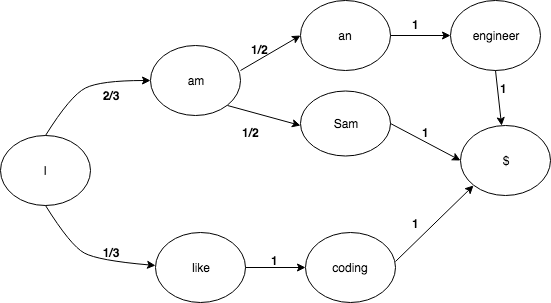

In [10]:
#Text Generation
"""Build a Markov Chain Function
We are going to build a simple Markov chain function that creates a dictionary:

The keys should be all of the words in the corpus
The values should be a list of the words that follow the keys """

from collections import defaultdict
def markov_chain(text):
    '''The input is a string of text and the output will be a dictionary with each word as
       a key and each value as the list of words that come after the key in the text.'''
    
    # Tokenize the text by word, though including punctuation
    words = text.split(' ')
    
    # Initialize a default dictionary to hold all of the words and next words
    m_dict = defaultdict(list)
    
    # Create a zipped list of all of the word pairs and put them in word: list of next words format
    for current_word, next_word in zip(words[0:-1], words[1:]):
        m_dict[current_word].append(next_word)

    # Convert the default dict back into a dictionary
    m_dict = dict(m_dict)
    return m_dict

In [15]:
woman_dict = markov_chain(CLEAN_DATA2)
woman_dict

{'': ['gabxxle',
  'this',
  'unitedstates',
  'lotto',
  'smartnews\n',
  'million',
  'of',
  'cardigan\n',
  'exile\n',
  'the',
  'betty\n',
  'august\n',
  'my',
  'tlgad\n…',
  'mirror',
  'after',
  '\n',
  'the',
  'cardigan\n',
  'exile\n',
  'the',
  'betty\n',
  'august\n',
  'my',
  '\n',
  '\n',
  'after',
  '\narent',
  'donate',
  '\n',
  '',
  'this',
  '\n',
  'httpstcocnmslxiqlu\n',
  '\n',
  '\n',
  '😳🙄🤪\n\nwoman',
  '\n',
  'on',
  'the',
  '\n',
  'after',
  'httpstcodhytzawgfy\n',
  'you',
  'after',
  'after',
  'after',
  'followers',
  'if',
  'after',
  'did',
  'after',
  'after',
  '\n\n💪🏻💪🏼💪🏽💪🏾💪🏿',
  'because',
  '“woman',
  'after”\nwas',
  '\n\n\n',
  'after',
  'after',
  'i',
  'students',
  'de',
  'has',
  'streaming',
  'a',
  'years',
  'mrharrycole',
  'followers',
  'feminismo',
  'my',
  'chartdata',
  'woman',
  '',
  '\n',
  'woman',
  '',
  '\n',
  'docked',
  'httpstcozpcydwbwhc\n',
  'docked',
  '',
  'accused',
  'march',
  'mar',
  '\n\n',

In [16]:
import random

def generate_sentence(chain, count=15):
    '''Input a dictionary in the format of key = current word, value = list of next words
       along with the number of words you would like to see in your generated sentence.'''

    # Capitalize the first word
    word1 = random.choice(list(chain.keys()))
    sentence = word1.capitalize()

    # Generate the second word from the value list. Set the new word as the first word. Repeat.
    for i in range(count-1):
        word2 = random.choice(chain[word1])
        word1 = word2
        sentence += ' ' + word2

    # End it with a period
    sentence += '.'
    return(sentence)

In [17]:

generate_sentence(woman_dict)

'Hold the resistance  💜💜💜\n fight like these pics don’t look i am woman in.'